# Tutorial: More advanced plotting 

This lab serves as an extension to the previous tutorial on the basics of data visualization in R.

## Goals:
* Learn how to extend `ggplot2` with `GGally`, `ggthemes` packages
* Learn about guidelines and best practices for creating **good** plots
* Learn how to customize plots in R using `ggplot2` and other packages

This tutorial draws from [Mastering software development in R](https://bookdown.org/rdpeng/RProgDA/), chapters 4.1 and 4.2.

---
# Extending `ggplot2`

`ggplot2` can be extended in a number of different ways, with different packages. We will focus on one particular package and example in this tutorial.

The [`GGally` package](https://cran.r-project.org/web/packages/GGally/GGally.pdf) has a useful function, called [`ggpairs`](https://www.rdocumentation.org/packages/GGally/versions/1.5.0/topics/ggpairs) that allows you to visually summarize relationships between variables within a dataset. It is often useful as an initial step in understanding and exploring associations within your data.

In [1]:
#suppress warnings for this notebook
options(warn=-1)
#to turn warnings back on
#options(warn=0)

#load packages
library(ggplot2)
install.packages("GGally")
suppressMessages( #suppress messages for this piece of code
    library(GGally))


The downloaded binary packages are in
	/var/folders/91/27xg0jcj2dq9rv01tz61gk9r0000gq/T//RtmpLI5r3T/downloaded_packages


As an example, let's load a dataset called nepali (part of the [faraway package](https://cran.r-project.org/web/packages/faraway/faraway.pdf)) that contains data about the health of a group of Nepalese children.

In [2]:
install.packages("faraway")
suppressMessages(
    library(faraway))
data(nepali)


The downloaded binary packages are in
	/var/folders/91/27xg0jcj2dq9rv01tz61gk9r0000gq/T//RtmpLI5r3T/downloaded_packages


For our purposes, we'll select basic variables including age, sex, height and weight. We'll also limit our dataset to include only the first measurement of our variables from each child. We can use tidyverse functions (`select()`, `mutate()`, and `distinct()`) to do so. 

In [3]:
suppressMessages(
    library(dplyr))

nepali <- nepali %>%
  select(id, sex, wt, ht, age) %>%
  mutate(id = factor(id),
         sex = factor(sex, levels = c(1, 2),
                      labels = c("Male", "Female"))) %>%
  distinct(id, .keep_all = TRUE)


Now, our dataset looks as follows:

In [4]:
head(nepali)

,id,sex,wt,ht,age
,<fct>,<fct>,<dbl>,<dbl>,<int>
1,120011,Male,12.8,91.2,41
6,120012,Female,14.9,103.9,57
11,120021,Female,7.7,70.1,8
16,120022,Female,12.1,86.4,35
21,120023,Male,14.2,99.4,49
26,120031,Male,13.9,96.4,46


We are now ready to take a look visually! Note, we don't actually want to plot the `id` variables, so we again take a subset of our dataset as input into the `ggpairs` function.

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


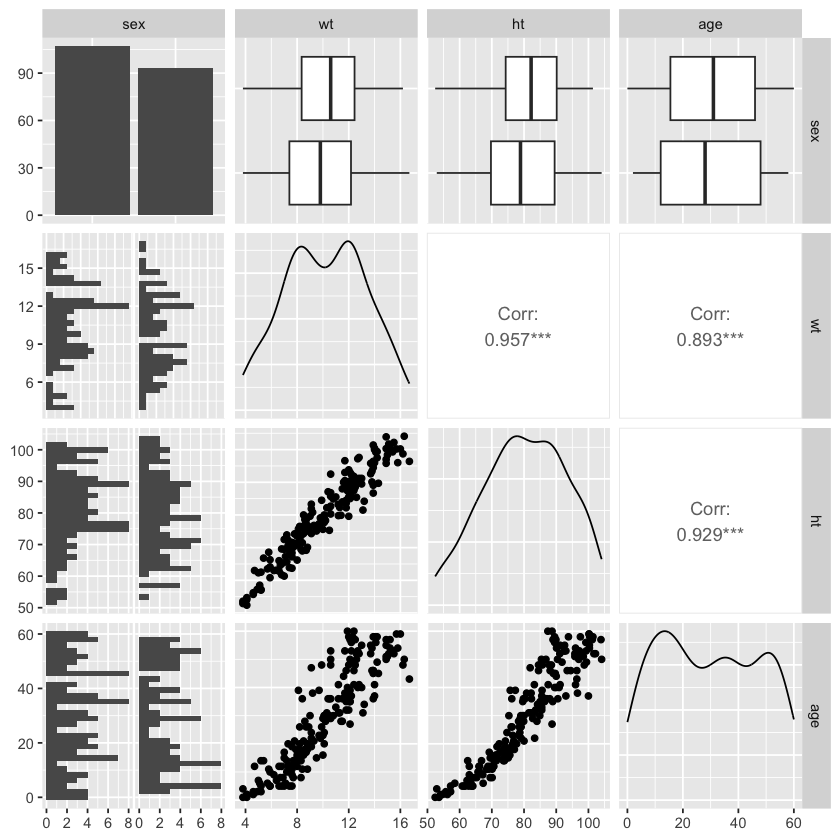

In [5]:
ggpairs(nepali %>% select(sex, wt, ht, age))

As we can see in the above graph, `ggpairs` automatically treats continuous and categorical variables differently. Categorical variables are broken down into bar charts (e.g., the upper left for the `sex` variable). Continuous variables are described using density plots (e.g., the plots along the diagonal for `wt`, `ht`, and `age` variables). 

---
# Customizing your visualizations

There are a lot of resources available about generating visualizations and graphics that communicate data effectively. This section will focus on some simple guidelines for creating **good** plots:

* Aim for high data density.
* Use clear, meaningful labels.
* Provide useful references.
* Consider using small multiples.
* Make order meaningful.

This section will use two datasets:
* worldcup (part of the [faraway package](https://cran.r-project.org/web/packages/faraway/faraway.pdf)), which contains data on players of the 2010 soccer World Cup
* chicagoNMMAPS (part of the [dlnm package](https://cran.r-project.org/web/packages/dlnm/dlnm.pdf), which contains data from the National Morbidity, Mortality and Air Pollution Study (NMMAPS) for the city of Chicago

In [6]:
data(worldcup) #part of the faraway package, which we already installed

install.packages("dlnm")
suppressMessages(
    library(dlnm))
data(chicagoNMMAPS)
chic <- chicagoNMMAPS
chic_july <- chic %>%
  filter(month == 7 & year == 1995) #limit dataset to July 1995

also installing the dependency 'tsModel'





The downloaded binary packages are in
	/var/folders/91/27xg0jcj2dq9rv01tz61gk9r0000gq/T//RtmpLI5r3T/downloaded_packages


## High data density


Guideline 1: Aim for high data density.

A good rule of thumb is to increase the data-to-ink ratio of your visualizations as much as is appropriate. This can essentially be boiled down to removing redundant plot components. Doing so allows the audience to understand the take home message of data the plot showcases more quickly and also provides space to add elements that highlight particular datapoints in the future. We'll come back to this latter idea in future sections.

Plot themes are a good first step for controlling the amount of extraneous plot components. There are built-in themes that come with `ggplot2` that have varying data-to-ink ratios. For example:
* `theme_linedraw`
* `theme_bw`
* `theme_minimal`
* `theme_void`
* `theme_dark`
* `theme_classic`

The [`ggthemes`](https://cran.r-project.org/web/packages/ggthemes/ggthemes.pdf) package, which extends `ggplot2`, has some useful additional themes. These themes can simply be added to a `ggplot` object, as we will see in the examples below.

To really understand what is meant by high data density and data-to-ink ratios, let's plot the daily mortality from chicagoNMMAPS data during July 1995, when a heatwave occurred using two different themes (among other differences).


The downloaded binary packages are in
	/var/folders/91/27xg0jcj2dq9rv01tz61gk9r0000gq/T//RtmpLI5r3T/downloaded_packages


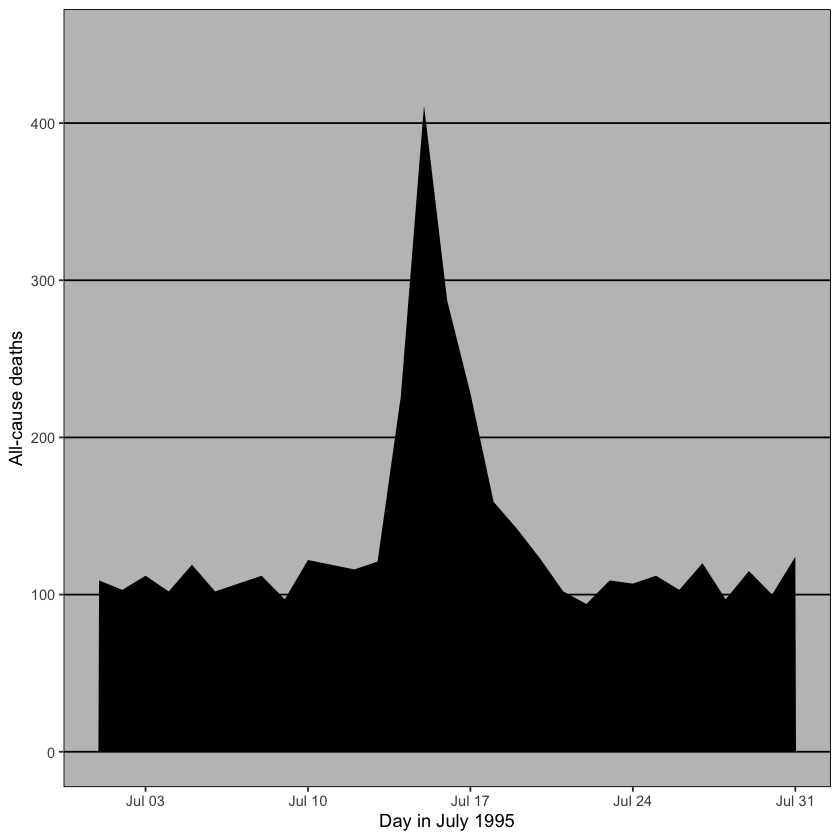

In [9]:
install.packages("ggthemes")
library(ggthemes)

chicago_plot <- ggplot(chic_july, aes(x = date, y = death)) + 
  xlab("Day in July 1995") + 
  ylab("All-cause deaths") + 
  ylim(0, 450) 

chicago_plot + 
  geom_area(fill = "black") + 
  theme_excel() #add ggtheme

In the above plot, excess ink in the form of background color, grid lines and black fill underneath the data doesn't contribute to ease of interpretation. 

When we remove these components (with the helpful use of a different theme), we get a much cleaner plot, as shown below.

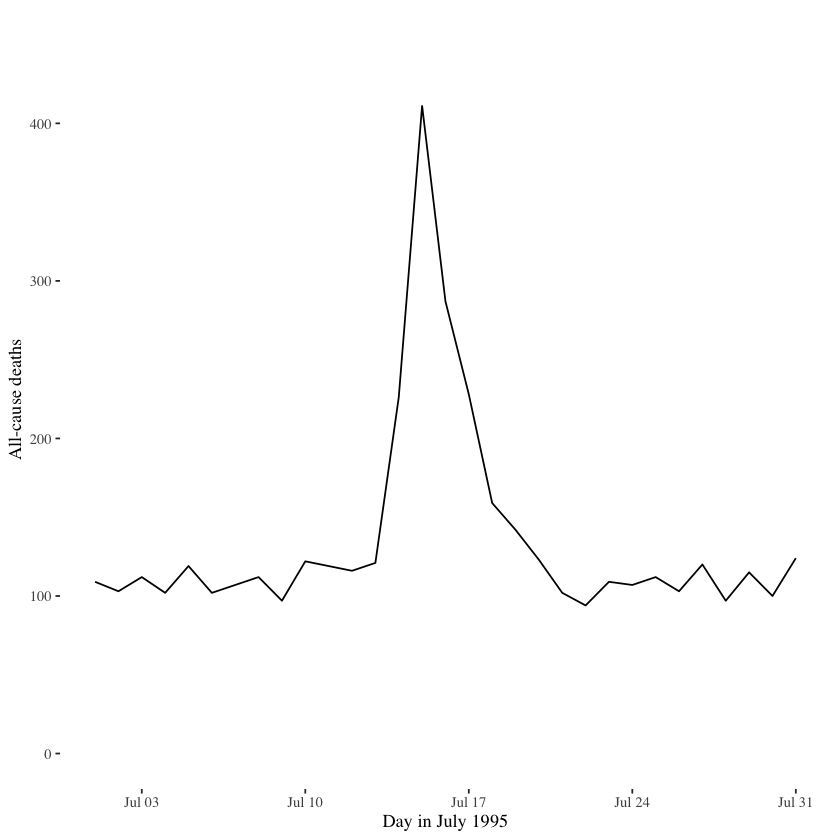

In [8]:
chicago_plot + 
  geom_line() + 
  theme_tufte() #ggtheme

## Meaningful labels

Guideline 2: Use clear, meaningful labels.

By default, `ggplot2` uses variable names as axes labels. This is not ideal for most purposes of data visualization outside of initial private data exploration. Instead, converting variable names into meaningful labels (with units if relevant) is a better approach. It is also helpful to rotate labels or indeed the orientation of plots to improve ease of interpretation.

Improving labels using `ggplot2`:
* Use `xlab` and `ylab` to customize axis labels, instead of the default behavior of using variable names
* Use `coord_flip` to modify the graph orientation

For example, we can use the worldcup dataset to plot the breakdown of players by position in two different ways that showcase either meaningful, easy-to-interpret labels or more difficult labels.

The below graph uses abreviations for the names of categorical variables as well as axis labels. 

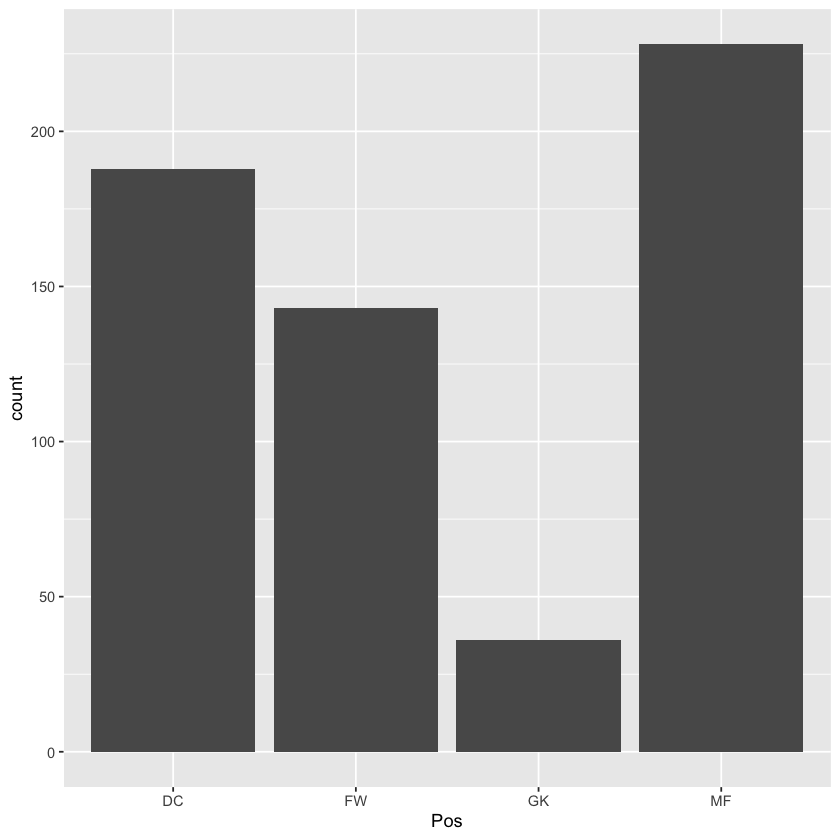

In [9]:
# First, create a messier example version of the data with 'bad' labels

library(forcats)

wc_example_data <- worldcup %>%
  dplyr::rename(Pos = Position) %>%
  mutate(Pos = fct_recode(Pos,
                          "DC" = "Defender",
                          "FW" = "Forward", 
                          "GK" = "Goalkeeper",
                          "MF" = "Midfielder"))

# Plot data

wc_example_data %>%
  ggplot(aes(x = Pos)) + 
  geom_bar() 

There are two easy fixes that can help improve the interpretibility of this graph: eliminating label abbreviations, swapping the orientation of the graph. The latter fix may seem arbitrary at first, but makes sense when we consider the former fix. Spelling out the position labels take space that could force the rotation of the labels to a vertical orientation, which makes them more difficult to read quickly. 

The graph below incorporates these two fixes.

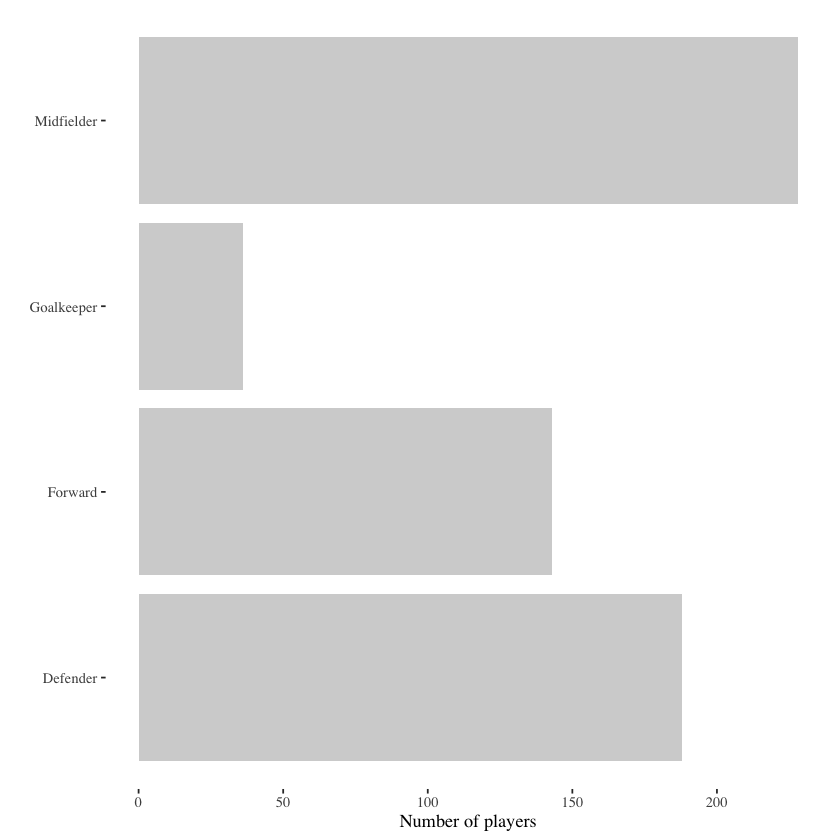

In [10]:
wc_example_data %>%
  mutate(Pos = fct_recode(Pos,
                          "Defender" = "DC",
                          "Forward" = "FW", 
                          "Goalkeeper" = "GK",
                          "Midfielder" = "MF")) %>%
  ggplot(aes(x = Pos)) +
  geom_bar(fill = "lightgray") + 
  xlab("") + 
  ylab("Number of players") + 
  coord_flip() + 
  theme_tufte()

While this advice may seem obvious, this simple guideline can go a long way to not only improving the overall aesthetic visualizations, but also adding to the ease with which the audience can grasp the take home message. This is turn clears up headspace for following the data story or understanding what these data mean within context. 

## References

Guideline 3: Provide useful references.

It can be helpful to add references or points of comparison to visualizations. Doing so can provide useful context for the audience when interpreting the take home message. For example, in the two graphs below, which show daily mortality data from the chicagoNMMAPS dataset for the year 1995, the shaded horizontal bar on the right graph shows the range of datapoints for the other years included in the dataset. Therefore, we can easily see that the mortality rates during the heatwave were unusual. 

![Reference comparison](https://bookdown.org/rdpeng/RProgDA/manuscript/images/referenceexample1-1.png)

Another useful reference point to add to visualizations is something that highlights trends within the data, such as a line of best fit - either linear or smoothed. 

The graph below uses the worldcup dataset to plot the association between number of passes and number of shots from Forwards. 

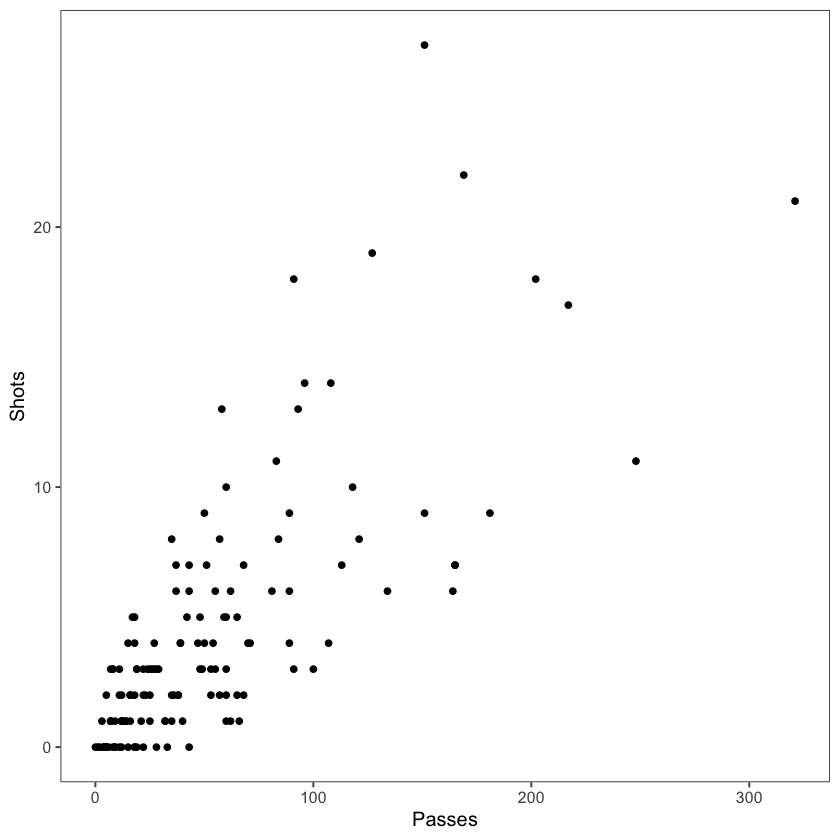

In [11]:
ggplot(filter(worldcup, Position == "Forward"), aes(x = Passes, y = Shots)) + 
        geom_point(size = 1.5) + 
        theme_few()

The graph below shows the same association with the addition of a smoothed reference line, which provides helpful visual cues about the relationship between these two variables. 

`geom_smooth()` using method = 'loess' and formula 'y ~ x'



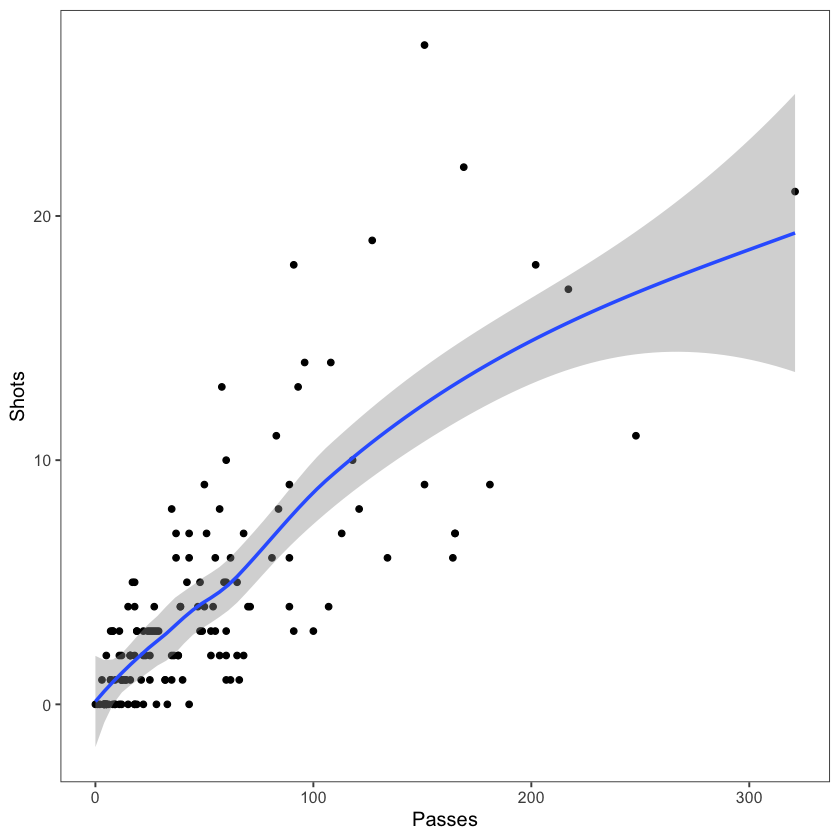

In [12]:
ggplot(filter(worldcup, Position == "Forward"), aes(x = Passes, y = Shots)) + 
        geom_point(size = 1.5) + 
        theme_few()  + 
        geom_smooth() #add reference line


Helpful `geom_smooth` parameters include:

* `method`: specify the type of reference line added (loess curve, generalized additive model, fitted linear model, generalized linear model)
* `span`: smoothness of the reference line (smaller values give increased flexibility and a more wiggly line, larger values give a more smoothed line)
* `se`: adds shading for 95% confidence intervals of the reference lines (TRUE or FALSE)
* `level`: confidence level for confidence interval


Other helpful `ggplot2` lines and shapes include:

* `geom_hline`, `geom_vline`: add a horizontal or vertical line
* `geom_abline`: add a line with an intercept and slope
* `geom_polygon`: add a filled polygon
* `geom_path`: add an unfilled polygon

Some practical guidance about adding reference points to graphs: 

* Add reference elements first, under the data, so they don't obscure the main data.
* Using the `alpha` parameter allows transparency control.

Ultimately, the goal of references is to support and add context to the main data of the visualizations, without overwhelming it.

## Small multiples



Guideline 4: When possible, use small multiples.

Often it is useful to compare different subsets of a dataset. This is what is meant by small multiples. 

As an example, let's return to the worldcup dataset. If we want to visualize the relationship between time played and shots on goal for different player positions, we could try using different colors to represent player position:


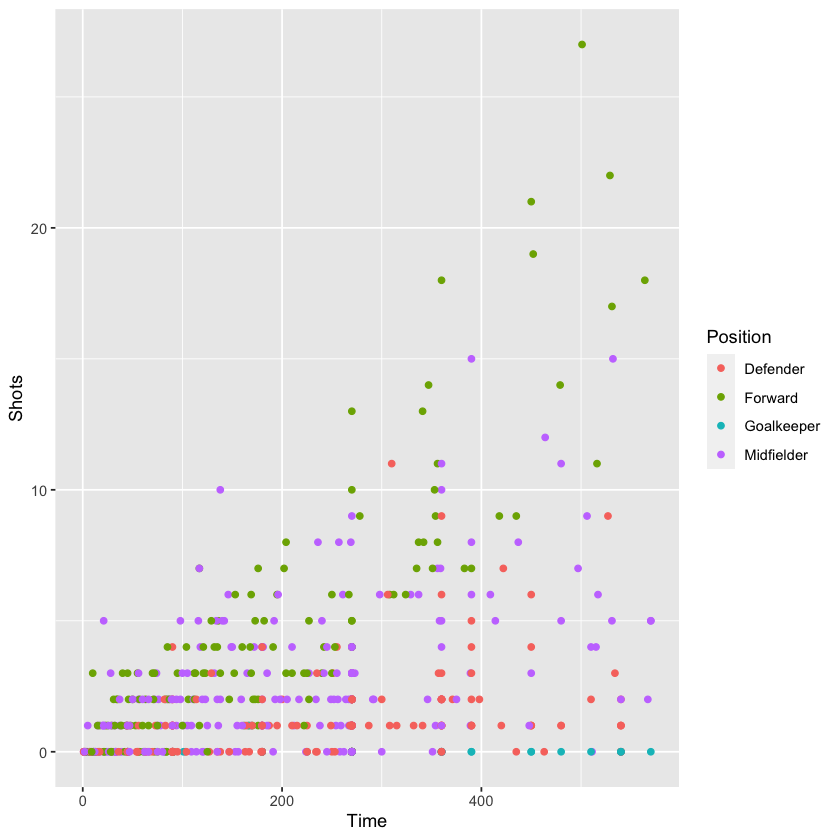

In [13]:
worldcup %>%
  ggplot(aes(x = Time, y = Shots, color = Position)) + 
  geom_point() 

But, applying the concept of small multiples, we can use the `facet_grid` and `facet_wrap` functions to split the graph into four separate graphs, one for each position. Ensuring the same axis ranges for the graphs helps with comparison, as we can see in the graphs below:


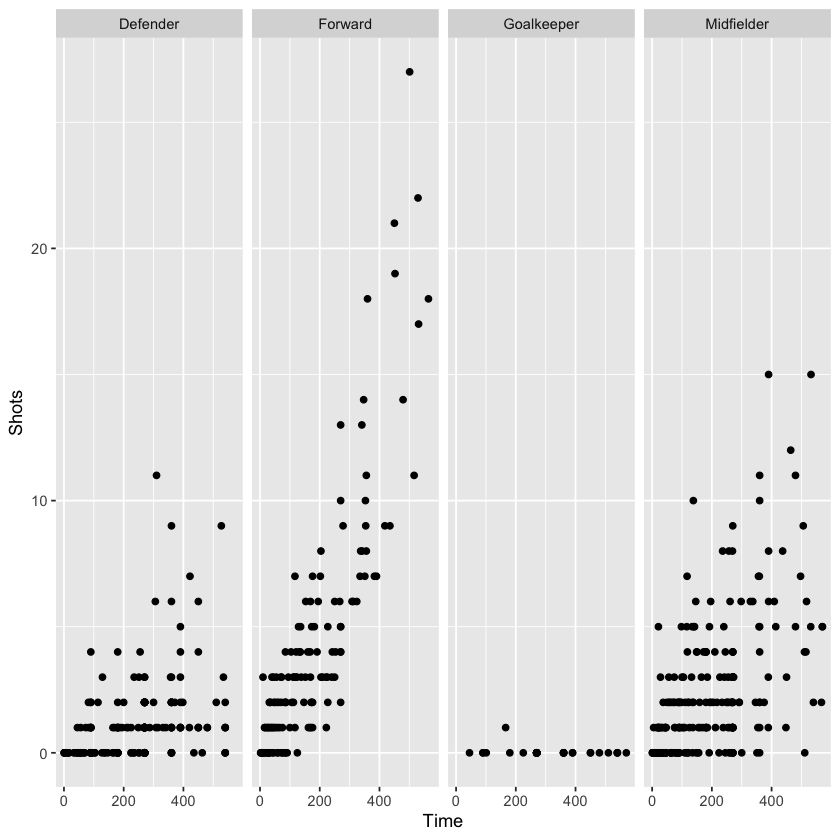

In [14]:
worldcup %>%
  ggplot(aes(x = Time, y = Shots)) + 
  geom_point() +
  facet_grid(. ~ Position) #. means all across all the data

There are some differences between the two facet functions. `facet_grid` allows one variable to be faceted for each dimension. `facet_wrap` allows faceting by more than one variable and allows wrapping, i.e., the small graphs don't need to all be in one row or column.

The formula for using `facet_grid`, as we did above, is as follows:

``` 
facet_grid([factor for rows] ~ [factor for columns])
```

The following is the formula for using `facet_wrap`:

```
facet_wrap(~ [formula with factor(s) for faceting],
           ncol = [number of columns])
```


Extending theabove graph, we can add another faceted variable to limit the graph to a comparison of players from two countries (Spain and Holland, the finalists): 


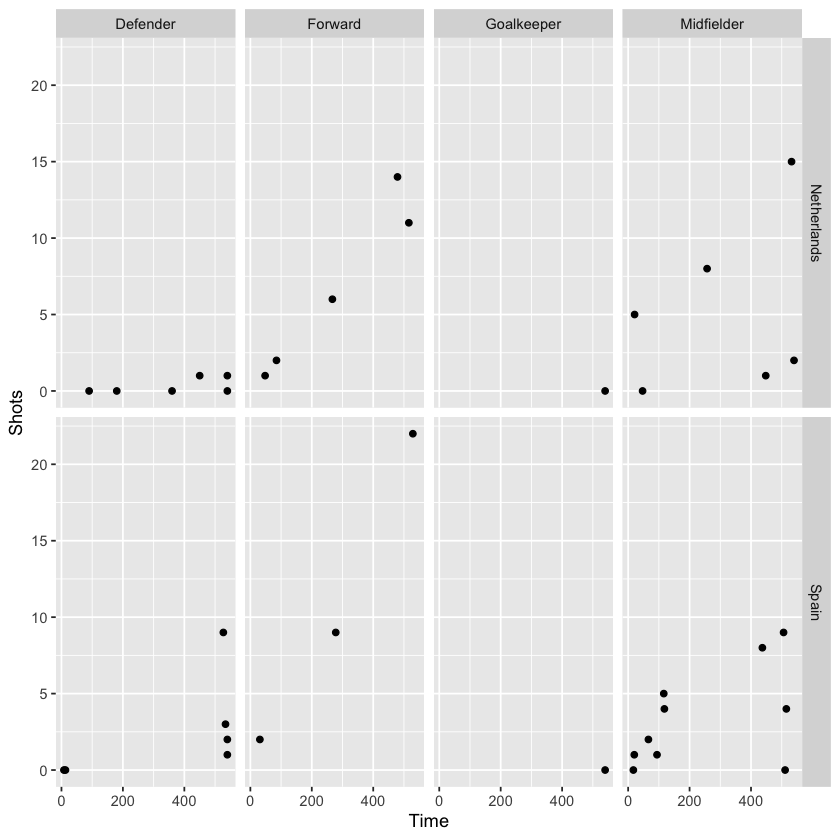

In [15]:
worldcup %>%
  filter(Team %in% c("Spain", "Netherlands")) %>%
  ggplot(aes(x = Time, y = Shots)) + 
  geom_point() +
  facet_grid(Team ~ Position)

On the other hand, using `facet_wrap`, we can specify the number of columns of small graphs, which can be helpful when faceting across a variable with many categories. Let's plot the same data this time separated by team:


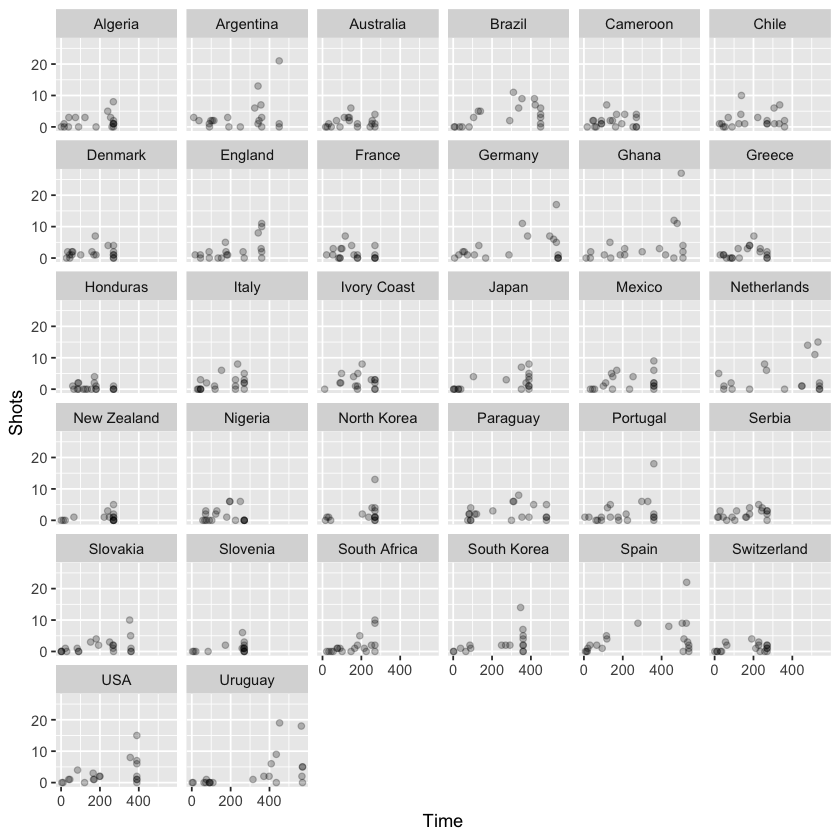

In [16]:
worldcup %>%
  ggplot(aes(x = Time, y = Shots)) + 
  geom_point(alpha = 0.25) +
  facet_wrap(~ Team, ncol = 6) 

## Order



Guideline 5: Make order meaningful.

Often, the default order for categorical variables is not particularly useful, e.g., alphabetical order. An example of this can be seen in the graph below that shows the mean time per player for each team in the worldcup dataset: 


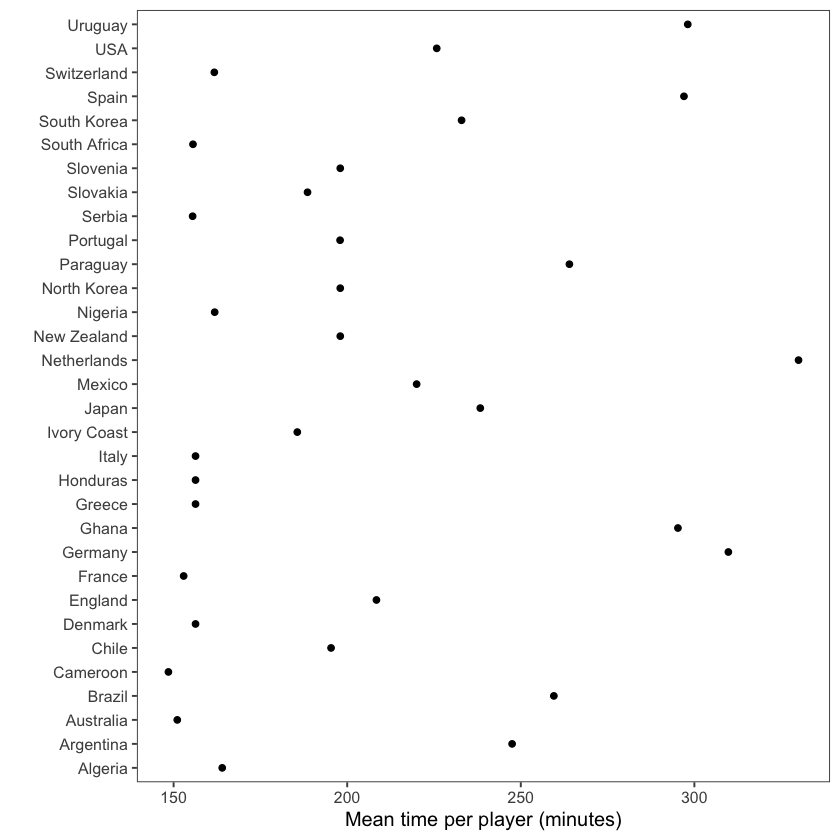

In [17]:
suppressMessages(
    worldcup %>%
      group_by(Team) %>%
      summarize(mean_time = mean(Time)) %>%
      ggplot(aes(x = mean_time, y = Team)) + 
      geom_point() + 
      theme_few() + 
      xlab("Mean time per player (minutes)") + ylab("") 
)

By contrast, the graph below has re-ordered the teams to clearly show the patterns within the data, in this case to show the rankings. To do so, we use the [`factor` function](https://www.rdocumentation.org/packages/base/versions/3.6.2/topics/factor):

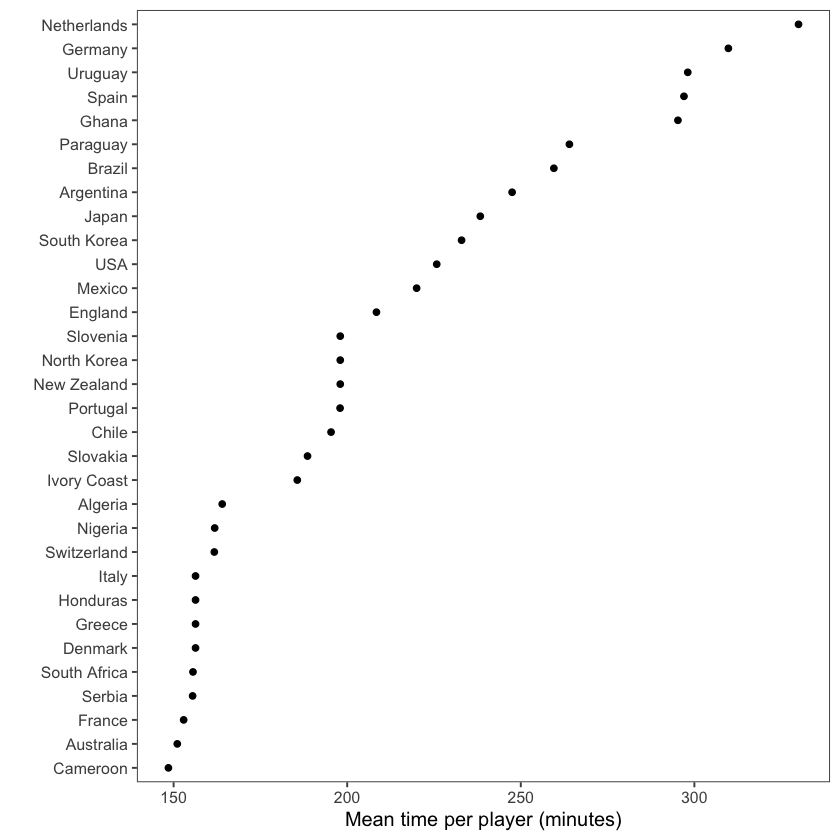

In [18]:
suppressMessages(
    worldcup %>%
      group_by(Team) %>%
      summarize(mean_time = mean(Time)) %>%
      arrange(mean_time) %>%                         # re-order categorical variable and re-set
      mutate(Team = factor(Team, levels = Team)) %>% # factor levels before plotting
      ggplot(aes(x = mean_time, y = Team)) + 
      geom_point() + 
      theme_few() + 
      xlab("Mean time per player (minutes)") + ylab("") 
)


The below graph is a more complex example, showing the distribution of playing times for each teach, again ordered by the mean time per player. To accomplish this, we use the tidyverse `group_by`, `mutate` and `arrange` functions in combination with `ggplot2`:


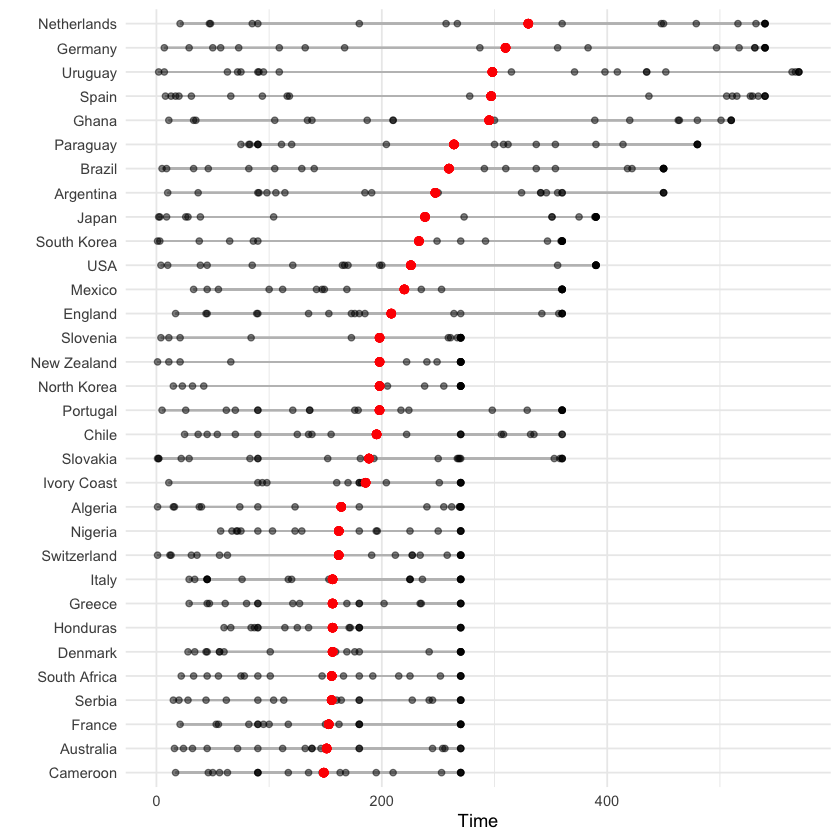

In [19]:
worldcup %>%
  select(Team, Time) %>%
  group_by(Team) %>% #group data by team
  mutate(ave_time = mean(Time),
         min_time = min(Time),
         max_time = max(Time)) %>% #average time within team
  arrange(ave_time) %>% #order by mean time
  ungroup() %>%
  mutate(Team = factor(Team, levels = unique(Team))) %>% #reset factor levels
  ggplot(aes(x = Time, y = Team)) + 
  geom_segment(aes(x = min_time, xend = max_time, yend = Team),
               alpha = 0.5, color = "gray") + 
  geom_point(alpha = 0.5) + 
  geom_point(aes(x = ave_time), size = 2, color = "red", alpha = 0.5) + 
  theme_minimal() + 
  ylab("")

---
# More resources

For more practical tips on plotting with ggplot2:
* [R Cookbook website](http://www.cookbook-r.com/Graphs/)
* [R Statistics - most popular visualizations](http://r-statistics.co/Top50-Ggplot2-Visualizations-MasterList-R-Code.html)
* [R Statistics - cheatsheet](http://r-statistics.co/ggplot2-cheatsheet.html)

Finally, it is often possible to use google image search to find examples of plots created in R that includes links to the code used to generate them.


Happy visualizing!

*Notebook authored by Amy Sentis.*